In [20]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import gower

# Read in the CSV file
df = pd.read_csv('selected_data1.csv')
# Filter the dataframe for rows where 'solved' column is 0
filtered_df = df[df['Solved'] == 0]

# Sample 
sampled_df = filtered_df.sample(frac=0.005, random_state=42) 



In [21]:
# Compute the Gower distance matrix
distance_matrix = gower.gower_matrix(sampled_df)
distance_matrix_df = pd.DataFrame(distance_matrix)


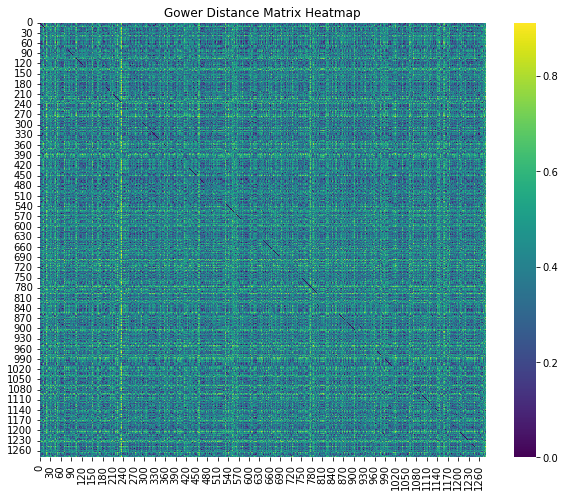

In [22]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_df, cmap='viridis')
plt.title('Gower Distance Matrix Heatmap')
plt.show()

C:\Users\megan\AppData\Local\Temp\ipykernel_17496\3866741004.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


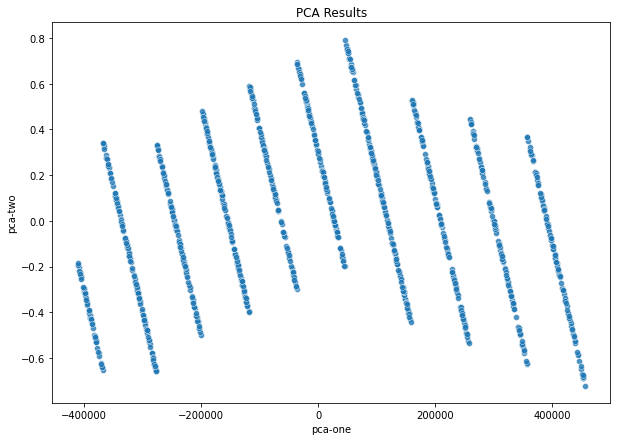

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(sampled_df.select_dtypes(include=[np.number]))

sampled_df['pca-one'] = pca_result[:,0]
sampled_df['pca-two'] = pca_result[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hsv", 10),
    data=sampled_df,
    legend="full",
    alpha=0.8
)
plt.title('PCA Results')
plt.show()


C:\Users\megan\AppData\Local\Temp\ipykernel_17496\3182284741.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='average')


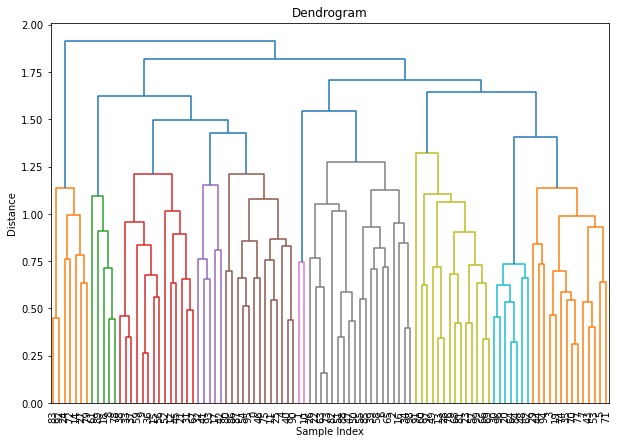

In [24]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from gower import gower_matrix

np.random.seed(42)  # For reproducible results
sampled_df = np.random.rand(100, 4)  # 100 samples with 4 features each
df = pd.DataFrame(sampled_df, columns=['VicSex', 'year_intervals', 'death_penalty_active', 'geopolitical_region'])

# Calculate Gower distance matrix
gower_dist = gower_matrix(df)

# Performing hierarchical clustering using Gower distance
Z = linkage(gower_dist, method='average')  

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the size as needed
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



C:\Users\megan\AppData\Local\Temp\ipykernel_17496\99291077.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='average')


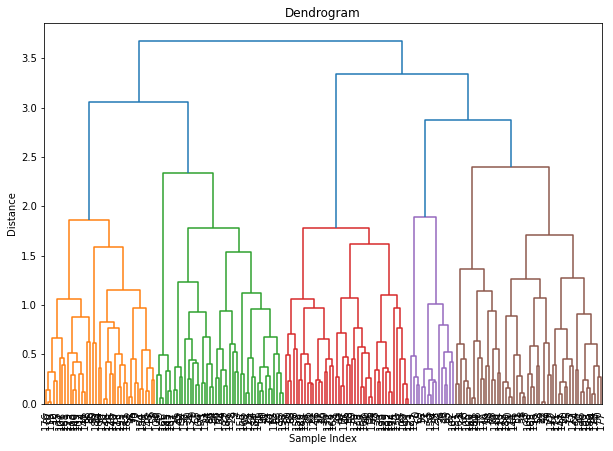

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

#

np.random.seed(42)  # For reproducible results
sampled_df = np.random.rand(200, 2)  # 10 samples with 4 features each
df = pd.DataFrame(sampled_df , columns=[ 'death_penalty_active', 'geopolitical_region'])

# Calculate Gower distance matrix
gower_dist = gower_matrix(df)

# Performing hierarchical clustering using Gower distance
Z = linkage(gower_dist, method='average')  

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the size as needed
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


C:\Users\megan\AppData\Local\Temp\ipykernel_17496\151538556.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='average')


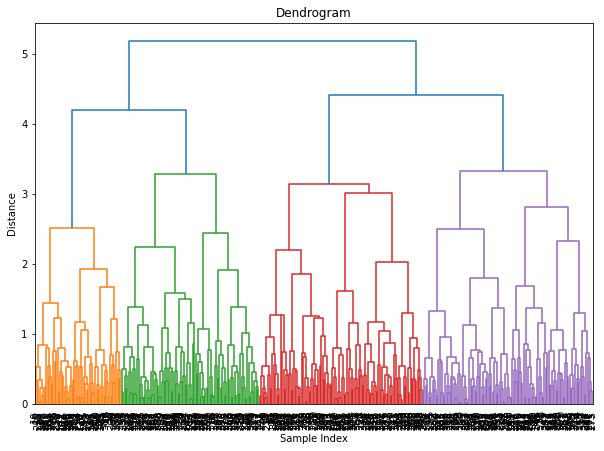

In [26]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

#

np.random.seed(42)  # For reproducible results
sampled_df = np.random.rand(400, 2)  # 10 samples with 4 features each
df = pd.DataFrame(sampled_df , columns=[ 'VicSex', 'year_intervals'])

# Calculate Gower distance matrix
gower_dist = gower_matrix(df)

# Performing hierarchical clustering using Gower distance
Z = linkage(gower_dist, method='average')  

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the size as needed
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


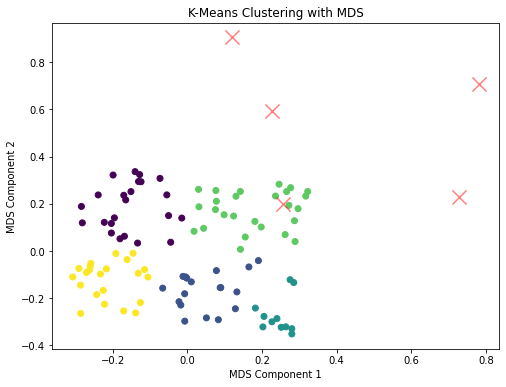

      VicSex  year_intervals  Cluster
0   0.374540        0.950714        2
1   0.731994        0.598658        3
2   0.156019        0.155995        4
3   0.058084        0.866176        2
4   0.601115        0.708073        3
..       ...             ...      ...
95  0.093103        0.897216        2
96  0.900418        0.633101        3
97  0.339030        0.349210        4
98  0.725956        0.897110        3
99  0.887086        0.779876        3

[100 rows x 3 columns]


In [27]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from gower import gower_matrix

# Sample data
np.random.seed(42)
sampled_df = np.random.rand(100, 2)

# Calculate Gower distance matrix
distance_matrix = gower_matrix(sampled_df)

# Apply Multi-Dimensional Scaling (MDS) to reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed')
X_reduced = mds.fit_transform(distance_matrix)

# Convert the reduced data into a DataFrame (optional, for convenience)
X_reduced_df = pd.DataFrame(X_reduced, columns=['MDS_Component_1', 'MDS_Component_2'])

# Original DataFrame
df = pd.DataFrame(sampled_df, columns=['VicSex', 'year_intervals'])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add cluster information to the DataFrame
df['Cluster'] = labels

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_df['MDS_Component_1'], X_reduced_df['MDS_Component_2'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title('K-Means Clustering with MDS')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()

# Print the DataFrame with cluster labels
print(df)




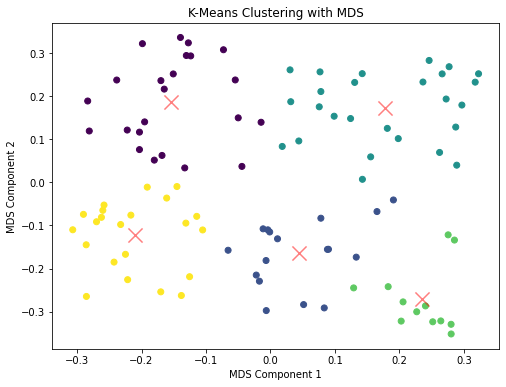

    MDS_Component_1  MDS_Component_2  Cluster
0          0.275645        -0.121876        3
1          0.098825         0.153420        2
2         -0.242588        -0.185138        4
3          0.226912        -0.300421        3
4          0.155477         0.059095        2
..              ...              ...      ...
95         0.240459        -0.286824        3
96         0.142375         0.252207        2
97        -0.114322        -0.078995        4
98         0.287415         0.128231        2
99         0.236558         0.232784        2

[100 rows x 3 columns]


In [28]:
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from gower import gower_matrix

# Sample data
np.random.seed(42)
sampled_df = np.random.rand(100, 2)

# Calculate Gower distance matrix
distance_matrix = gower_matrix(sampled_df)

# Apply Multi-Dimensional Scaling (MDS) to reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed')
X_reduced = mds.fit_transform(distance_matrix)

# Convert the reduced data into a DataFrame (optional, for convenience)
X_reduced_df = pd.DataFrame(X_reduced, columns=['MDS_Component_1', 'MDS_Component_2'])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_reduced_df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add cluster information to the DataFrame
X_reduced_df['Cluster'] = labels

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_df['MDS_Component_1'], X_reduced_df['MDS_Component_2'], c=X_reduced_df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title('K-Means Clustering with MDS')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()

# Print the DataFrame with cluster labels
print(X_reduced_df)


    death_penalty_active  geopolitical_region  Cluster
0               0.374540             0.950714        0
1               0.731994             0.598658        1
2               0.156019             0.155995        0
3               0.058084             0.866176        0
4               0.601115             0.708073        1
..                   ...                  ...      ...
95              0.093103             0.897216        0
96              0.900418             0.633101        1
97              0.339030             0.349210        0
98              0.725956             0.897110        1
99              0.887086             0.779876        1

[100 rows x 3 columns]


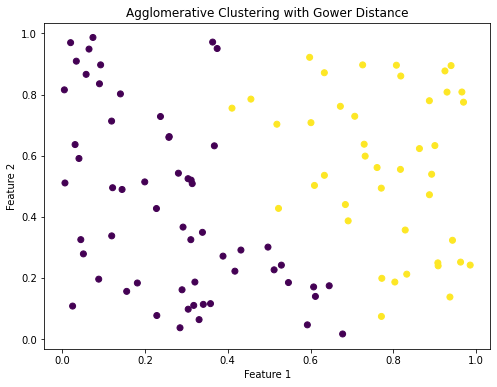

In [29]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from gower import gower_matrix

# Sample data
np.random.seed(42)
sampled_df = np.random.rand(100, 2)

# Convert the data into a DataFrame (optional, for convenience)
df = pd.DataFrame(sampled_df, columns=['death_penalty_active', 'geopolitical_region'])

# Calculate Gower distance matrix
gower_dist = gower_matrix(df)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average').fit(gower_dist)

# Get cluster labels
labels = agg_clustering.labels_

# Add cluster information to the DataFrame
df['Cluster'] = labels

# Print the DataFrame with cluster labels
print(df)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['death_penalty_active'], df['geopolitical_region'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering with Gower Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


C:\Users\megan\AppData\Local\Temp\ipykernel_17496\1651978122.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='average')


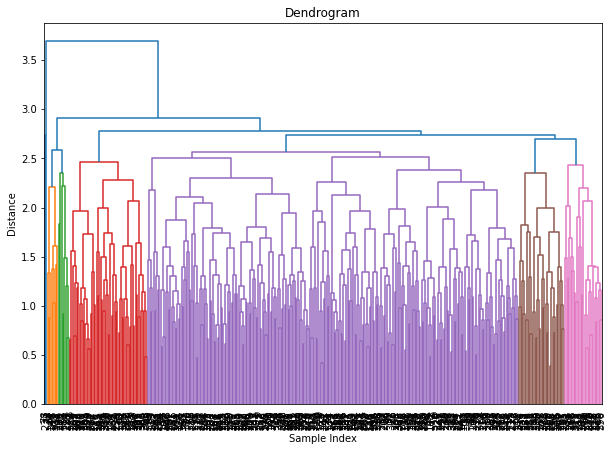

In [30]:

np.random.seed(42)  # For reproducible results
sampled_df = np.random.rand(400, 6)  # 10 samples with 4 features each
df = pd.DataFrame(sampled_df , columns=[ 'VicSex', 'year_intervals','death_penalty_active', 'geopolitical_region','weapon_category','political_affiliation'])

# Calculate Gower distance matrix
gower_dist = gower_matrix(df)

# Performing hierarchical clustering using Gower distance
Z = linkage(gower_dist, method='average')  

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the size as needed
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
